## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [9]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\dataset (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Loading the Data

In [12]:
 df.shape

(303, 14)

In [14]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Missing Values 

In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Visualization

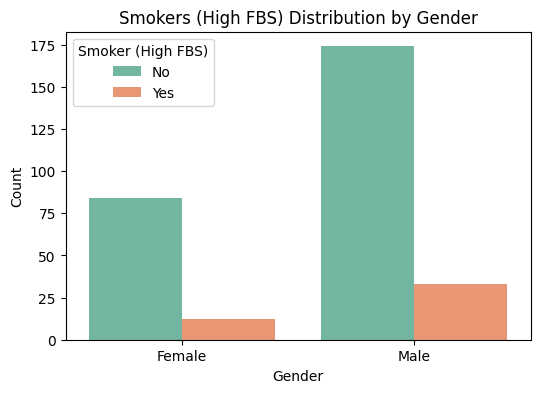

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='fbs', data=df, palette='Set2')

plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Smokers (High FBS) Distribution by Gender")
plt.legend(title='Smoker (High FBS)', labels=['No', 'Yes'])
plt.show()

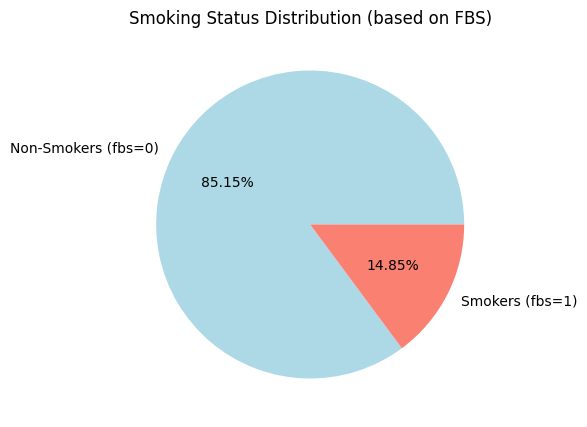

In [28]:
plt.figure(figsize=(10,5))
df["fbs"].value_counts().plot.pie(
    autopct='%0.2f%%',
    labels=['Non-Smokers (fbs=0)', 'Smokers (fbs=1)'],
    colors=['lightblue', 'salmon']
)
plt.title("Smoking Status Distribution (based on FBS)")
plt.ylabel("")
plt.show()

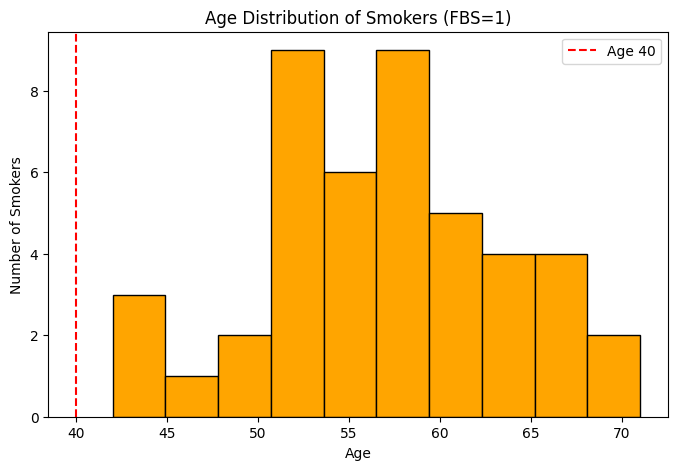

In [36]:
# Filter 'smokers' (fbs = 1)
smokers = df[df["fbs"] == 1]

# Plot histogram of ages for smokers
plt.figure(figsize=(8,5))
plt.hist(smokers["age"], bins=10, color='orange', edgecolor='black')

plt.title("Age Distribution of Smokers (FBS=1)")
plt.xlabel("Age")
plt.ylabel("Number of Smokers")
plt.axvline(40, color='red', linestyle='--', label='Age 40')
plt.legend()
plt.show()

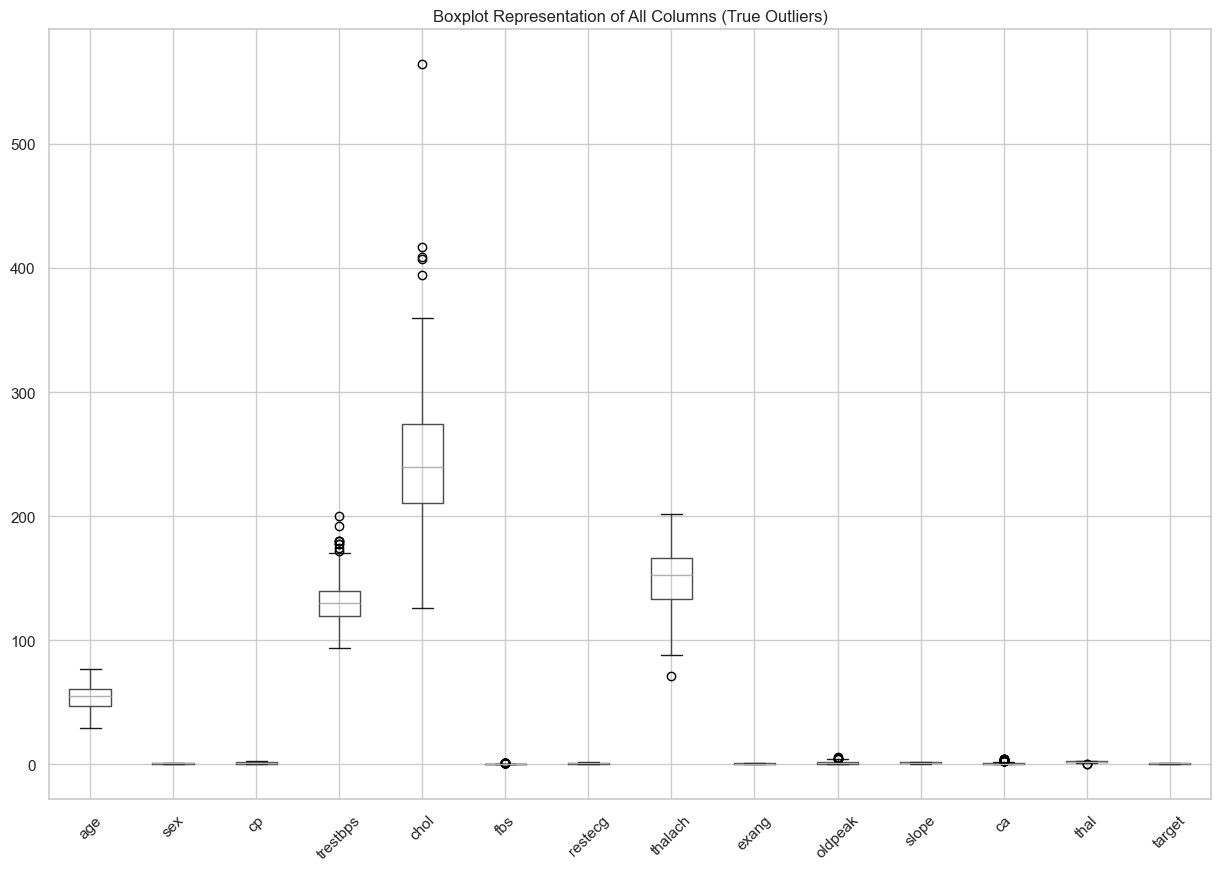

In [40]:
# Set the style
sns.set(style="whitegrid")

# Plot boxplots for all numeric columns
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Representation of All Columns (True Outliers)")
plt.show()

## Data Cleaning 

In [43]:
# Identify categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# One Hot Encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the new DataFrame
print(df_encoded.head())
print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)

   age  trestbps  chol  thalach  oldpeak  target  sex_1   cp_1   cp_2   cp_3  \
0   63       145   233      150      2.3       1   True  False  False   True   
1   37       130   250      187      3.5       1   True  False   True  False   
2   41       130   204      172      1.4       1  False   True  False  False   
3   56       120   236      178      0.8       1   True   True  False  False   
4   57       120   354      163      0.6       1  False  False  False  False   

   ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  \
0  ...    False    False    False  False  False  False  False    True   False   
1  ...    False    False    False  False  False  False  False   False    True   
2  ...    False    False     True  False  False  False  False   False    True   
3  ...    False    False     True  False  False  False  False   False    True   
4  ...     True    False     True  False  False  False  False   False    True   

   thal_3  
0   False  
1   Fals

## Feature selection using feature importance 

In [45]:
from sklearn.ensemble import RandomForestClassifier
# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

In [47]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
})

In [51]:
# Sort by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Display top features
print(feature_importances)

     Feature  Importance
2         cp    0.135346
7    thalach    0.129879
11        ca    0.108091
12      thal    0.105813
9    oldpeak    0.102469
0        age    0.091921
4       chol    0.076270
3   trestbps    0.075079
8      exang    0.058675
10     slope    0.055157
1        sex    0.030980
6    restecg    0.021797
5        fbs    0.008522


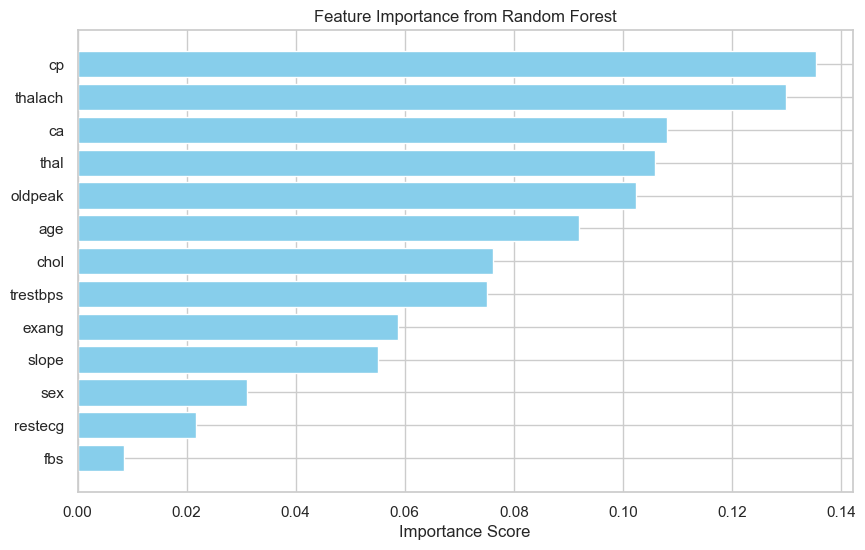

In [53]:
# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.show()

## Logistic Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
# 3. Train-Test Split (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Initialize and fit Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [59]:
# 5. Make predictions
y_pred = log_reg.predict(X_test)

# 6. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8131868131868132

Confusion Matrix:
 [[32  9]
 [ 8 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



## Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
# 3. Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)  # You can tune max_depth
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [70]:
# 5. Predictions
y_pred = dt_model.predict(X_test)

# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7252747252747253

Confusion Matrix:
 [[34  7]
 [18 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.83      0.73        41
           1       0.82      0.64      0.72        50

    accuracy                           0.73        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.75      0.73      0.72        91



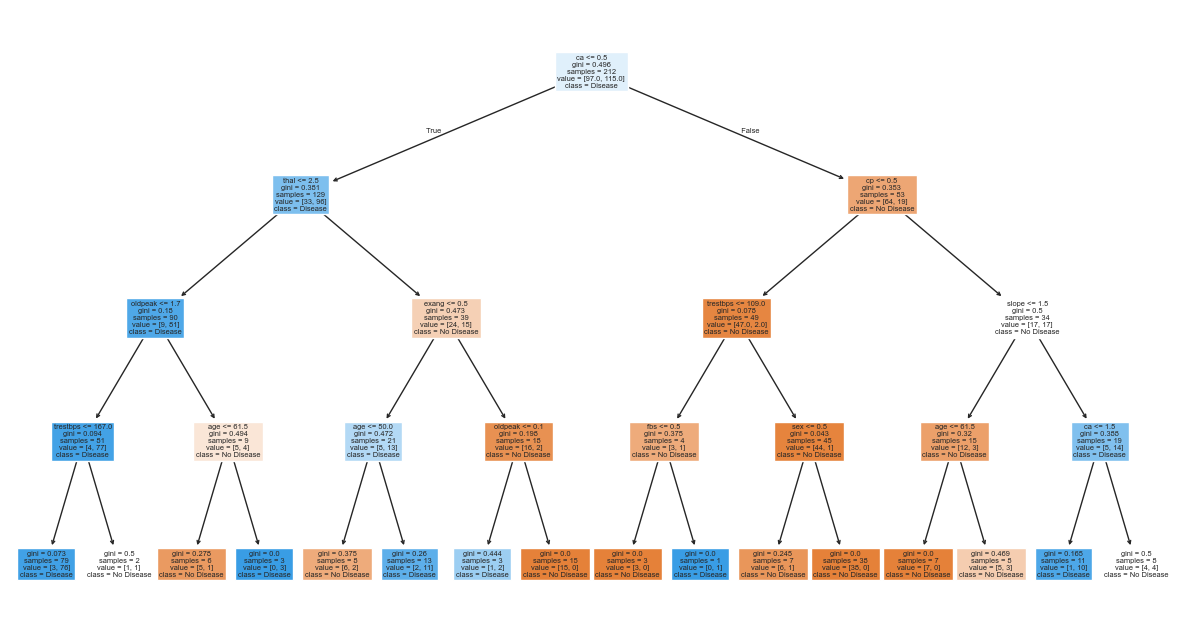

In [72]:
# 7. Visualize the decision tree
plt.figure(figsize=(15,8))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

## Bagging Algorithm – Bagging Classifier

## 1️⃣ Bagging Classifier (with Decision Tree as base model)

In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Features & target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Updated Bagging Classifier syntax
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag_clf.fit(X_train, y_train)

# Predictions
y_pred = bag_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))


Bagging Classifier Accuracy: 0.8131868131868132


## 2️⃣ Bagging with Extra Trees Classifier

In [81]:
from sklearn.ensemble import ExtraTreesClassifier

# Extra Trees Classifier
extra_trees_clf = ExtraTreesClassifier(
    n_estimators=100,
    random_state=42
)
extra_trees_clf.fit(X_train, y_train)

# Predictions
y_pred = extra_trees_clf.predict(X_test)
print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred))

Extra Trees Accuracy: 0.8021978021978022


## 3️⃣ Bagging with Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.8241758241758241
